In [1]:
import numpy as np

# NumPy for Input/Output

In eariler lectures, we have learned how to use `f = open()` to read/write data into a file.\
However, the simple useage require a lot of work to specify the data format/structure.

In this tutorial, we will learn how to use `numpy` to load/write data.\
Another popular package for handling python data is called `pandas` (REF: https://pandas.pydata.org/docs/user_guide/index.html).\
We might or might not talk about `pandas` in this course, depending on the progress of learning. 

## Write data (numpy arrays) into a text file.

We could write data to a text file with `numpy.savetxt()`.\
REF: https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html#numpy.savetxt

In [2]:
# create some fake data first
times = np.linspace(0,1,20)
posx  = 5.0*times + 0.5*0.0*times**2
posy  = 5.0*times - 0.5*9.81*times**2
velx  = 5.0 + 0.0*times
vely  = 5.0 - 9.81*times

In [3]:
print(posx)

[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]


In [4]:
# save to a text file
np.savetxt('data_test1.txt',times)
np.savetxt('data_test2.csv',(times,posx,posy,velx,vely), delimiter=',')
np.savetxt('data_test3.log',(times,posx,posy,velx,vely),fmt='%1.14e', delimiter=' ') # use scientific notation
np.savetxt('data_test4.csv',(times,posx,posy,velx,vely),fmt='%14.6e', delimiter=',', header='header', footer='footer', comments='%') # add header

In [10]:
# if we want the format similar to our previous Trajectory.py
header = "Angry bird trajectory: \n"
header += "created by Gary 2023/05/07\n \n"
header += f"{'times':14}, {'posx':14}, {'posy':14}, {'velx':14}, {'vely':14}"
footer = "A footer"
np.savetxt('data_test5.csv',np.array([times,posx,posy,velx,vely]).T,fmt='%14.6e', delimiter=',', header=header, footer=footer, comments='#') # add header

## Load (text) data files

To load the plain text data file, we could use `numpy.loadtxt()`.\
REF: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [34]:
# save to a text file
np.savetxt('data_test1.txt',times, encoding='utf8')
np.savetxt('data_test2.txt',(times,posx,posy,velx,vely), delimiter=' ', encoding='utf8')
np.savetxt('data_test3.txt',(times,posx,posy,velx,vely),fmt='%1.14e', delimiter=' ', encoding='utf8') # use scientific notation
np.savetxt('data_test4.txt',(times,posx,posy,velx,vely),fmt='%14.6e', delimiter=' ', header='header', footer='footer', comments='#', encoding='utf8') # add header
# if we want the format similar to our previous Trajectory.py
header = "Angry bird trajectory: \n"
header += "created by Gary 2023/05/07\n \n"
header += f"{'times':14}, {'posx':14}, {'posy':14}, {'velx':14}, {'vely':14}"
footer = "A footer"
np.savetxt('data_test5.txt',np.array([times,posx,posy,velx,vely]).T,fmt='%14.6e', delimiter=' ', header=header, footer=footer, comments='#') # add header

In [35]:
# We could use the shell command 'cat' to check the data first.
!head -n 5 'data_test1.txt'

0.000000000000000000e+00
5.263157894736839731e-02
1.052631578947370028e-01
1.578947368421050046e-01
2.105263157894740056e-01


In [36]:
db1 = np.loadtxt('data_test1.txt')
print(db1)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [37]:
db2 = np.loadtxt('data_test2.txt')
[times, posx, posy, velx, vely] = db2
print(times,posx, posy,velx,vely)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ] [0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ] [0.         0.24957064 0.47196676 0.66718837 0.83523546 0.97610803
 1.08980609 1.17632964 1.23567867 1.26785319 1.27285319 1.25067867
 1.20132964 1.12480609 1.02110803 0.89023546 0.73218837 0.54696676
 0.33457064 0.095     ] [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] [ 5.          4.48368421  3.96736842  3.45105263  2.93473684  2.41842105
  1.90210526  1.38578947  0.86947368  0.35315789 -0.16315789 -0.67947368
 -1.19578947 -1.71210526 -2.22842105 -2.74473684 -3.26105263 -3.77736842
 -4.29368421 -4.81      ]


In [38]:
# We could custmize the `delimiter` and `comments` as well. 
db3 = np.loadtxt('data_test3.txt', delimiter=' ', comments='#')
[times, posx, posy, velx, vely] = db3
print(times,posx, posy,velx,vely)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ] [0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ] [0.         0.24957064 0.47196676 0.66718837 0.83523546 0.97610803
 1.08980609 1.17632964 1.23567867 1.26785319 1.27285319 1.25067867
 1.20132964 1.12480609 1.02110803 0.89023546 0.73218837 0.54696676
 0.33457064 0.095     ] [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] [ 5.          4.48368421  3.96736842  3.45105263  2.93473684  2.41842105
  1.90210526  1.38578947  0.86947368  0.35315789 -0.16315789 -0.67947368
 -1.19578947 -1.71210526 -2.22842105 -2.74473684 -3.26105263 -3.77736842
 -4.29368421 -4.81      ]


In [39]:
# `data_test5.txt` had a transpose beofore saving the data, we could convert it back
# with the `unpack=True` argument. 
db5 = np.loadtxt('data_test5.txt', unpack=True)
[times, posx, posy, velx, vely] = db5
print(times,posx, posy,velx,vely)

[0.         0.05263158 0.1052632  0.1578947  0.2105263  0.2631579
 0.3157895  0.3684211  0.4210526  0.4736842  0.5263158  0.5789474
 0.6315789  0.6842105  0.7368421  0.7894737  0.8421053  0.8947368
 0.9473684  1.        ] [0.        0.2631579 0.5263158 0.7894737 1.052632  1.315789  1.578947
 1.842105  2.105263  2.368421  2.631579  2.894737  3.157895  3.421053
 3.684211  3.947368  4.210526  4.473684  4.736842  5.       ] [0.        0.2495706 0.4719668 0.6671884 0.8352355 0.976108  1.089806
 1.17633   1.235679  1.267853  1.272853  1.250679  1.20133   1.124806
 1.021108  0.8902355 0.7321884 0.5469668 0.3345706 0.095    ] [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] [ 5.         4.483684   3.967368   3.451053   2.934737   2.418421
  1.902105   1.385789   0.8694737  0.3531579 -0.1631579 -0.6794737
 -1.195789  -1.712105  -2.228421  -2.744737  -3.261053  -3.777368
 -4.293684  -4.81     ]


In [40]:
# If we only need part of the data, we could set `usecols=[]` to save loading time.
[times, posx, velx] = np.loadtxt('data_test5.txt', usecols=[0,1,3], unpack=True)
print(times,posx, velx)

[0.         0.05263158 0.1052632  0.1578947  0.2105263  0.2631579
 0.3157895  0.3684211  0.4210526  0.4736842  0.5263158  0.5789474
 0.6315789  0.6842105  0.7368421  0.7894737  0.8421053  0.8947368
 0.9473684  1.        ] [0.        0.2631579 0.5263158 0.7894737 1.052632  1.315789  1.578947
 1.842105  2.105263  2.368421  2.631579  2.894737  3.157895  3.421053
 3.684211  3.947368  4.210526  4.473684  4.736842  5.       ] [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [41]:
# We could also skip a given number of rows in the data
times = np.loadtxt('data_test5.txt', usecols=[0], unpack=True)
print(len(times))
print(times)
times = np.loadtxt('data_test5.txt', usecols=[0], unpack=True, skiprows=6) # note that the `skiprows` includes header
print(len(times))
print(times)
times = np.loadtxt('data_test5.txt', usecols=[0], unpack=True, skiprows=4,max_rows=10) # max_rows doesn't inculde header/footer
print(len(times))
print(times)

20
[0.         0.05263158 0.1052632  0.1578947  0.2105263  0.2631579
 0.3157895  0.3684211  0.4210526  0.4736842  0.5263158  0.5789474
 0.6315789  0.6842105  0.7368421  0.7894737  0.8421053  0.8947368
 0.9473684  1.        ]
18
[0.1052632 0.1578947 0.2105263 0.2631579 0.3157895 0.3684211 0.4210526
 0.4736842 0.5263158 0.5789474 0.6315789 0.6842105 0.7368421 0.7894737
 0.8421053 0.8947368 0.9473684 1.       ]
10
[0.         0.05263158 0.1052632  0.1578947  0.2105263  0.2631579
 0.3157895  0.3684211  0.4210526  0.4736842 ]


## Save or Load to a binary file

Plain texts are easy to read and check the data but they use more dist storage than binary file.\
Therefore, if the data size is big, it is better to store the data as a binary file(s). 

In [42]:
# Create Fake big data
data = np.ones(shape=(1024,1024)) # a 2D numpy array

In [44]:
# First, use `np.savetxt()'
np.savetxt('data1.d',data)

In [45]:
# Use `np.save()` 
np.save('data1',data)

In [46]:
# Use `np.savez()` to store a zip file
# zip file could zip multiple numpy arrays, 
# but use only one array fist for an example
np.savez('data1',data)

In [47]:
# `np.savez_compressed()` do the same things as `np.savez()`,
# but is compressed. 
np.savez_compressed('data1z',data)

In [50]:
# check the file size
!ls -lh data1*

-rw-r--r--@ 1 gary  staff    25M May  8 17:18 data1.d
-rw-r--r--@ 1 gary  staff   8.0M May  8 17:18 data1.npy
-rw-r--r--@ 1 gary  staff   8.0M May  8 17:18 data1.npz
-rw-r--r--@ 1 gary  staff    12K May  8 17:18 data1z.npz


Loading the binary data ...

In [53]:
db1_txt = np.loadtxt('data1.d')
db1_bin = np.load('data1.npy')
db1_zip = np.load('data1.npz')
db1_cz  = np.load('data1z.npz')
print(db1_txt)
print(db1_bin)
print(db1_txt.all() == db1_bin.all())
print(db1_zip['arr_0']) # the default key
print(db1_cz['arr_0'])  # the default key

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
True
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


### Save mupltiple data into a compressed zip file

In the angry bird example, we have multiple numpy arrays (e.g. times, posx, posy, ...)\
We could give a `key` to these data and store everything in a binary file.


In [54]:
# create some fake data first
times = np.linspace(0,1,1000)
posx  = 5.0*times + 0.5*0.0*times**2
posy  = 5.0*times - 0.5*9.81*times**2
velx  = 5.0 + 0.0*times
vely  = 5.0 - 9.81*times

In [55]:
# save to a binary file
np.savez_compressed('data2',times=times,
                    posx=posx,posy=posy, 
                    velx=velx,vely=vely)

In [58]:
# Load the binary files
db = np.load('data2.npz')

# show the keys
print(db.files)

# access the data
print(db["times"][0:10])
print(db["posx"][0:10])

['times', 'posx', 'posy', 'velx', 'vely']
[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901]
[0.         0.00500501 0.01001001 0.01501502 0.02002002 0.02502503
 0.03003003 0.03503504 0.04004004 0.04504505]


## Exercise: NumPy IO for the angry bird game

Modify the below angry bird sample code to store the trajectories with `numpy.savetxt` and `numpy.savez_compressed`.

In [63]:
#
#
#
#           TODO: Modify this program
#
#
#

import sys
import math
import matplotlib.pyplot as plt
from typing import List

# Constants
G        = 9.81 # gravitational accerlation      [m/s/s]
DISTANCE = 100  # distance to the pig            [m]
DX       = 1    # error tolerance                [m]
DT       = 0.1  # time step to record trajectory [sec]

def play(velocity=30, angle=45, plot=True):
    """
    The main function to play the angry bird game.
    """
    print(f"The input velociy is {velocity}")
    print(f"The input angle is {angle}")
    values   = [velocity,angle]
    distance = calculate_trajectory(values, plot)
    
    if abs(distance - DISTANCE) <= DX:
        print("You win!!!")
    else:
        print(f"Ooopps. dx = {distance - DISTANCE}")

    return # play()

def calculate_trajectory(values:List[float], plot:bool) -> float:
    """
    Functio to calculate the trajectory of the angry bird

    :parama values: [velocity, angle]
    :return: the distance to travel
    """
    v0  = values[0]
    angle     = values[1]
    angle_rad = math.radians(angle)

    # calculate the travel distance
    distance = v0**2 * math.sin(2*angle_rad) / G

    # calculate times, positions_x,_y, vx, vy, ..
    time = 2.0 * v0*math.sin(angle_rad) /G  # total fly time
    nsteps = math.ceil(time / DT) + 1
    
    times = []
    posx  = []
    posy  = []
    velx  = []
    vely  = []

    t  = 0.0
    vx0 = v0 * math.cos(angle_rad)
    vy0 = v0 * math.sin(angle_rad)
    for n in range(nsteps):
        # calculate time
        if (t > time):
            t = time
        times.append(t)

        # calculate position and velocity
        x  = vx0 * t
        y  = vy0 * t - 0.5*G*t**2
        vx = vx0
        vy = vy0 - G*t
        posx.append(x)
        posy.append(y)
        velx.append(vx)
        vely.append(vy)

        t += DT

    if plot:
        plot_trajectory(posx,posy)
    # output(times, posx, posy, velx, vely)
    output_numpy(times, posx, posy, velx, vely)

    return distance

def output( times:List[float], posx:List[float], 
            posy:List[float], velx:List[float], 
            vely:List[float]):
    """
    Write the trajectory to a file

    :param times: a list to store time info
    :param posx: a list to store x positions
    :param posy: a list to store y positions
    :param velx: a list to store vx
    :param vely: a list to store vy

    :return: None
    """

    f = open("trajectory.txt",mode="w")
    f.write("# {:>12}  {:>12}  {:>12}  {:>12}  {:>12}\n".format("time [s]",
                                                            "x [m]", "y [m]", 
                                                            "vx [m/s]", "vy [ms]"))

    for t,x,y,vx,vy in zip(times,posx,posy,velx,vely):
        line = f"  {t:>12.6e}  {x:>12.6e}  {y:>12.6e}  {vx:>12.6e}  {vy:>12.6e}\n"
        f.write(line)

    f.close()
    return

def output_numpy(times:List[float], posx:List[float], 
                posy:List[float], velx:List[float], 
                vely:List[float]) -> None:
    """
    Write the trajectory to a file

    :param times: a list to store time info
    :param posx: a list to store x positions
    :param posy: a list to store y positions
    :param velx: a list to store vx
    :param vely: a list to store vy

    :return
    """
    np.savez_compressed('angrybird_data_npz',
                        times=times,
                        posx=posx, posy=posy, 
                        velx=velx, vely=vely)
    
    return


def plot_trajectory(x:List[float],y:List[float]):
    """
    Plot the trajectroy and save it as a png file.

    :param x: a python list that inlcudes the x positions of a trajectory
    :param y: a python list that includes the y positions of a trajectory
    :param show: show the plot or not
    
    both lists must have the same length
    """
    if len(x) != len(y):
        print("Error: the length of the lists x and y must be the same!")
    else:
        plt.figure(1,figsize=(8,6))
        plt.plot(x,y,'-o')
        plt.xlabel(' X [code units]')
        plt.ylabel(' Y [code units]')
        plt.savefig('fig_trajectory.png')
    return

The input velociy is 32
The input angle is 45
Ooopps. dx = 4.383282364933734


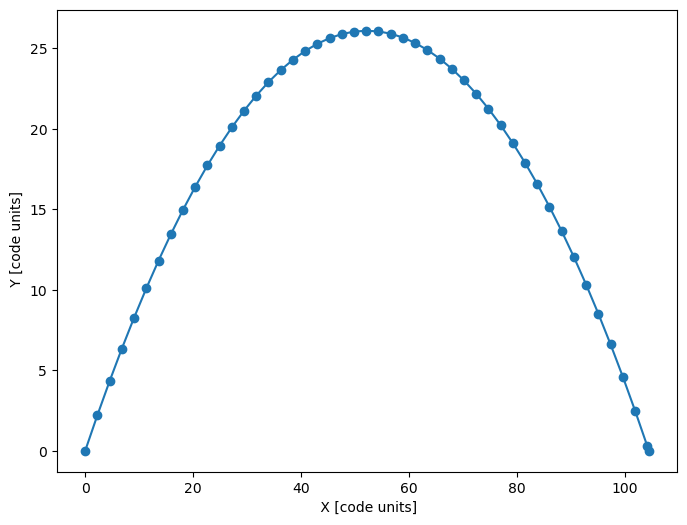

In [64]:
# Play the game
play(velocity=32,angle=45,plot=True)

In [66]:
# Load the binary files
db = np.load('angrybird_data_npz.npz')

# show the keys
keys = db.files
print(keys)

# access the data
print(db[keys[0]][0:10])
print(db[keys[1]][0:10])
print(db[keys[2]])

['times', 'posx', 'posy', 'velx', 'vely']
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[ 0.         2.2627417  4.5254834  6.7882251  9.0509668 11.3137085
 13.5764502 15.8391919 18.1019336 20.3646753]
[0.00000000e+00 2.21369170e+00 4.32928340e+00 6.34677510e+00
 8.26616680e+00 1.00874585e+01 1.18106502e+01 1.34357419e+01
 1.49627336e+01 1.63916253e+01 1.77224170e+01 1.89551087e+01
 2.00897004e+01 2.11261921e+01 2.20645838e+01 2.29048755e+01
 2.36470672e+01 2.42911589e+01 2.48371506e+01 2.52850423e+01
 2.56348340e+01 2.58865257e+01 2.60401174e+01 2.60956091e+01
 2.60530008e+01 2.59122925e+01 2.56734842e+01 2.53365759e+01
 2.49015676e+01 2.43684593e+01 2.37372510e+01 2.30079427e+01
 2.21805344e+01 2.12550261e+01 2.02314178e+01 1.91097095e+01
 1.78899012e+01 1.65719929e+01 1.51559846e+01 1.36418763e+01
 1.20296680e+01 1.03193597e+01 8.51095139e+00 6.60444309e+00
 4.59983479e+00 2.49712649e+00 2.96318191e-01 1.42108547e-14]
